In [72]:
import numpy as np
import pandas as pd
import datetime



%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

def inv_y(transformed_y):
    return np.exp(transformed_y)


In [73]:
rf_test = pickle.load(open("rf_test.t", 'rb'))
val_y = pickle.load(open("val_y.t", 'rb'))
val_X = pickle.load(open("val_X.t", 'rb'))

In [75]:
def percent_graph(val_y, rf_test,val):
    val_y.reset_index()
    inv_y(val_y)
    cc=pd.DataFrame(inv_y(val_y))
    #print(inv_y(val_y))

    xx=pd.DataFrame(inv_y(val_y))
    xx['1']=inv_y(rf_test)
    xx['2']=(((inv_y(rf_test)/inv_y(val_y))-1)*100)
    if val==1:
        return xx['2']
    if val==0:
        return xx['1']

    
percent_error = percent_graph(val_y,rf_test,1)
model_price = percent_graph(val_y,rf_test,0)

val_XA=val_X[['age','status','fullweight','power']]
eval_df=pd.concat([val_XA, percent_error,inv_y(val_y),model_price], axis=1, join='inner')
eval_df_x=eval_df[eval_df['age']> 6]



In [76]:
percent_error=eval_df.sort_values(by='2')


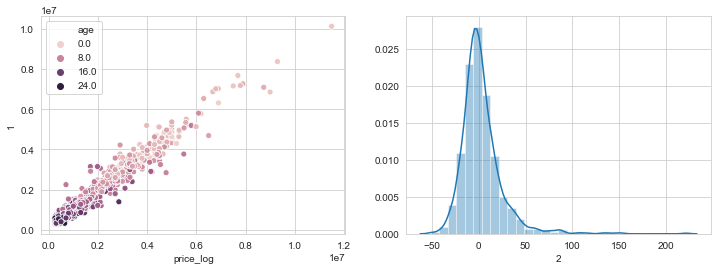

In [79]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(12, 4)
sns.set_style("whitegrid")
sns.scatterplot(x='price_log',y='1', data=eval_df, hue='age', ax=ax[0])
#sns.set(xlabel='Jelenlegi ár[Ft]', ylabel='Becsült ár[Ft]')
#plt.title('Becslés pontossága')

sns.distplot(eval_df['2'], bins=30, ax=ax[1])
#sns.set(xlabel='Jelenlegi ár[Ft]', ylabel='Becsült ár[Ft]')
#plt.title('Hiba')
#plt.show()



plt.show()

In [80]:
dropindex=zzu[eval_df['2'] > 100.0].index
zzu=zzu.drop(dropindex,axis=0)

percent_error=eval_df.sort_values(by='2')



c:\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
